In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import ipywidgets as widgets

- Est-ce que ça doit être jouable partout ?
- Est-ce que un tapis de jeu est envisageable (avec des marqueurs etc)

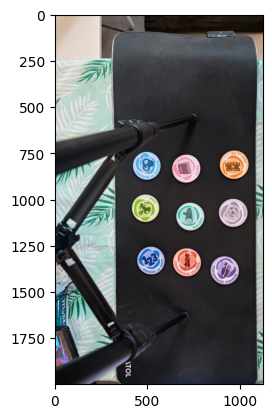

In [2]:
m1_o = cv.imread("./images/mysteres1.jpg")
m1_o = cv.cvtColor(m1_o, cv.COLOR_BGR2RGB)

m1_o = cv.resize(m1_o, (m1_o.shape[1] // 2, m1_o.shape[0] // 2))

plt.imshow(m1_o)

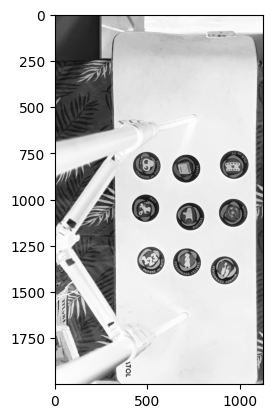

In [3]:
m1_gray = cv.cvtColor(m1_o, cv.COLOR_RGB2GRAY)
m1_blur = cv.medianBlur(m1_gray, 5)
plt.imshow(m1_blur, cmap="Grays")

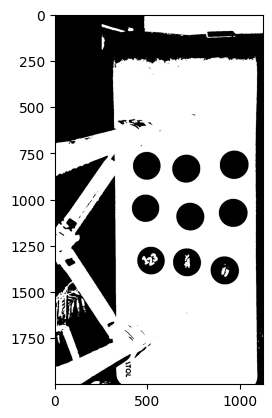

In [4]:
_, m1_thresh = cv.threshold(m1_blur, 70, 255, cv.THRESH_BINARY)
plt.imshow(m1_thresh, cmap="Grays")

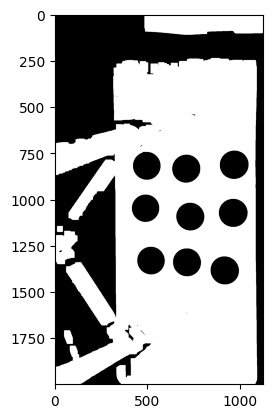

In [5]:
m1_closed = cv.morphologyEx(m1_thresh, cv.MORPH_CLOSE, np.ones((31, 31)))
plt.imshow(m1_closed, cmap="Grays")

In [48]:
m1_circles = cv.HoughCircles(m1_closed, cv.HOUGH_GRADIENT, dp=1, minDist=100, param1=50, param2=10, minRadius=73, maxRadius=78)
m1_circles = m1_circles[0,:]
print(m1_circles)

[[ 516.5 1332.5   74.6]
 [ 706.5  835.5   75.8]
 [ 964.5  814.5   77.4]
 [ 493.5  819.5   75.2]
 [ 959.5 1073.5   77.4]
 [ 709.5 1341.5   75.2]
 [ 914.5 1385.5   76.3]
 [ 728.5 1095.5   75.8]
 [ 486.5 1048.5   74.5]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


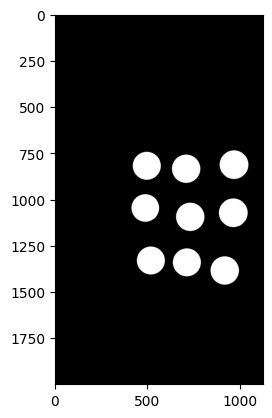

In [49]:
img_black = np.zeros(m1_o.shape)

circles = np.uint16(np.around(m1_circles))
for i in circles:
    # draw the outer circle
    cv.circle(img_black, (i[0], i[1]), i[2], (255, 255, 255), cv.FILLED, 2)
plt.imshow(img_black)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


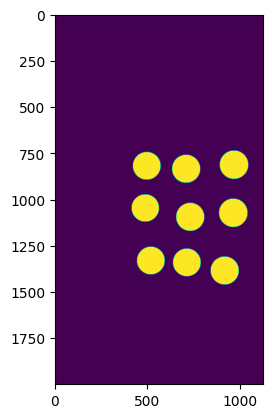

In [51]:
mask = np.full((m1_o.shape[0], m1_o.shape[1]),0,dtype=np.uint8)
print(mask)
for i in circles:
    cv.circle(mask, (i[0], i[1]), i[2], (255, 255, 255), -1)
plt.imshow(mask)

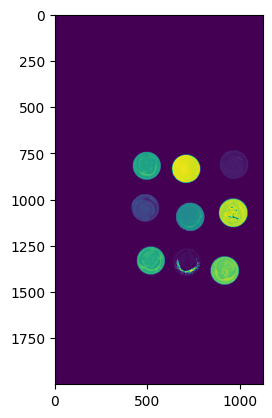

In [57]:
m1_hsv = cv.cvtColor(m1_o, cv.COLOR_RGB2HSV)
h,s,v = cv.split(m1_hsv)
image_masked = cv.bitwise_and(h, h, mask=mask)
plt.imshow(image_masked)